In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:**

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

**Ответ:**

    С моей точки зрения, все наборы данных могут быть исследованы в плане зависимости какого-либо параметра от времени. Все данные фиксируются в некоторые моменты времени. События развиваются на протяжении времени.

**2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.**

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
# проверим пропуски
data["DUQ_MW"].isnull().sum()

0

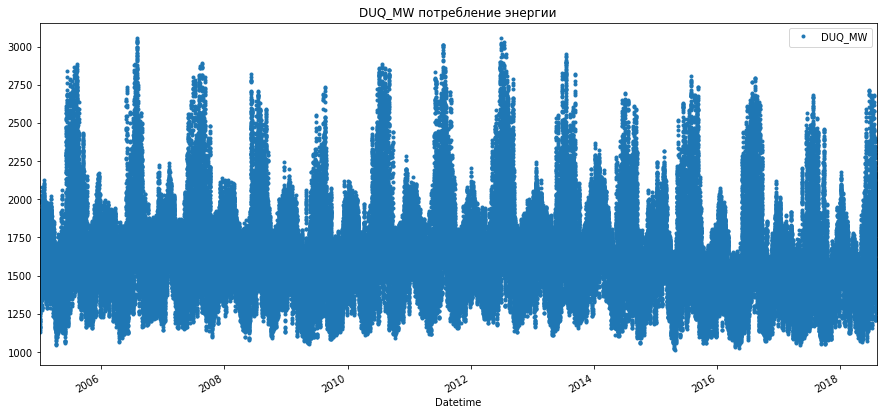

In [5]:
data.plot(style='.', figsize=(15,7), title='DUQ_MW потребление энергии' )

**Описание датасета:**
1. пропуски отсутствуют;
2. визуально: данные имеют циклический характер;
3. явные выборосы отсутствуют.

**3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )**

In [6]:
brent_df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [7]:
brent_df.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [8]:
brent_W_std = brent_df.resample("W").std()
brent_W_mean = brent_df.resample("W").mean()

In [9]:
brent_W_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [10]:
brent_W_mean.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


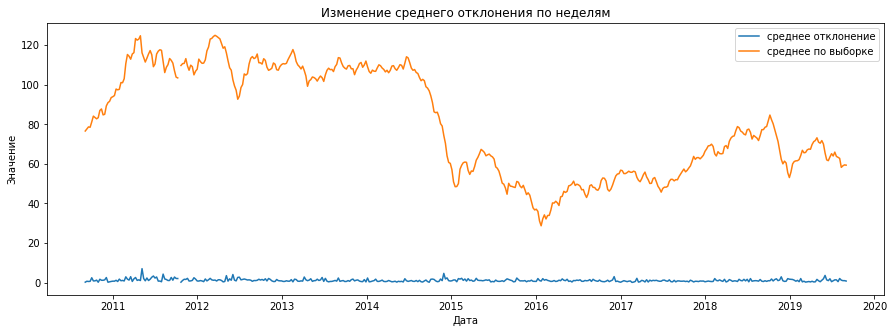

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(brent_W_std['Значение'], label='среднее отклонение')
plt.plot(brent_W_mean['Значение'], label='среднее по выборке')
plt.legend()
plt.title('Изменение среднего отклонения по неделям')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

In [12]:
brent_M_std = brent_df.resample("M").std()
brent_M_mean = brent_df.resample("M").mean()

In [13]:
brent_M_std.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


In [14]:
brent_M_mean.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


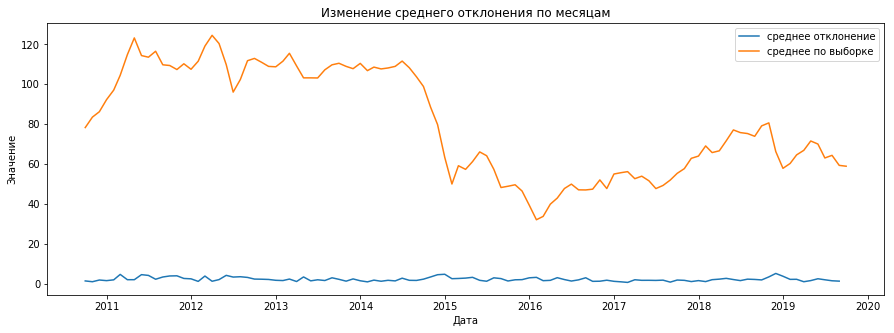

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(brent_M_std['Значение'], label='среднее отклонение')
plt.plot(brent_M_mean['Значение'], label='среднее по выборке')
plt.legend()
plt.title('Изменение среднего отклонения по месяцам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

In [16]:
brent_Y_std = brent_df.resample("Y").std()
brent_Y_mean = brent_df.resample("Y").mean()

In [17]:
brent_Y_std.head()

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923


In [18]:
brent_Y_mean.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


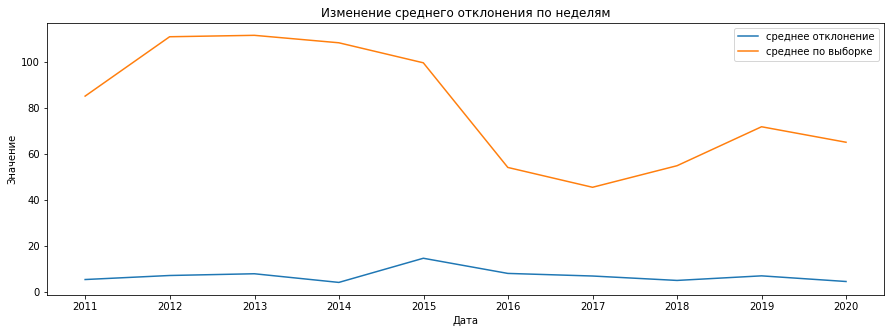

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(brent_Y_std['Значение'], label='среднее отклонение')
plt.plot(brent_Y_mean['Значение'], label='среднее по выборке')
plt.legend()
plt.title('Изменение среднего отклонения по неделям')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.show()

**4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

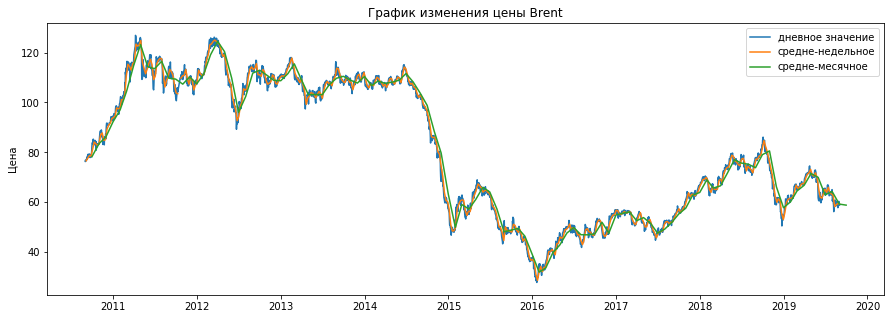

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(brent_df, label='дневное значение')
plt.plot(brent_W_mean, label='средне-недельное')
plt.plot(brent_M_mean, label='средне-месячное')
plt.title('График изменения цены Brent')
plt.ylabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

**Вывод:**

    Поведение цены на всех трех графиках близки, однако месячный график более сглажен.